In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('../../../Datasets/class_exercise/Tractor-Sales.csv')

In [35]:
df.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [36]:
df.rename(columns={'Number of Tractor Sold': 'Target'}, inplace=True)
df.rename(columns={'Month-Year': 'X'}, inplace=True)

In [37]:
df.isnull().sum()

X         0
Target    0
dtype: int64

In [38]:
df.shape

(144, 2)

In [39]:
df.duplicated().sum()

0

In [40]:
df["X"].is_unique

True

In [41]:
df.dtypes

X         object
Target     int64
dtype: object

In [43]:
df['X'] = pd.to_datetime(df['X'], format="%b-%y")

In [44]:
df.dtypes

X         datetime64[ns]
Target             int64
dtype: object

In [45]:
df.head()

,X,Target
0,2003-01-01,141
1,2003-02-01,157
2,2003-03-01,185
3,2003-04-01,199
4,2003-05-01,203


In [46]:
df['X'].min()

Timestamp('2003-01-01 00:00:00')

In [47]:
df['X'].max()

Timestamp('2014-12-01 00:00:00')

In [49]:
dates=pd.date_range(start="2003-01-01", end="2014-12-01", freq="MS")
dates=pd.DataFrame(dates, columns=["X"])

dates.head(5)

,X
0,2003-01-01
1,2003-02-01
2,2003-03-01
3,2003-04-01
4,2003-05-01


In [58]:
df1=pd.merge(dates, df, how="left", left_on="X", right_on="X")
df1

,X,Target
0,2003-01-01,141
1,2003-02-01,157
2,2003-03-01,185
3,2003-04-01,199
4,2003-05-01,203
...,...,...
139,2014-08-01,848
140,2014-09-01,640
141,2014-10-01,581
142,2014-11-01,519


In [59]:
df

,X,Target
0,2003-01-01,141
1,2003-02-01,157
2,2003-03-01,185
3,2003-04-01,199
4,2003-05-01,203
...,...,...
139,2014-08-01,848
140,2014-09-01,640
141,2014-10-01,581
142,2014-11-01,519


In [60]:
df1['Target'].isna().sum()

0

In [62]:
df1.set_index("X", inplace=True)

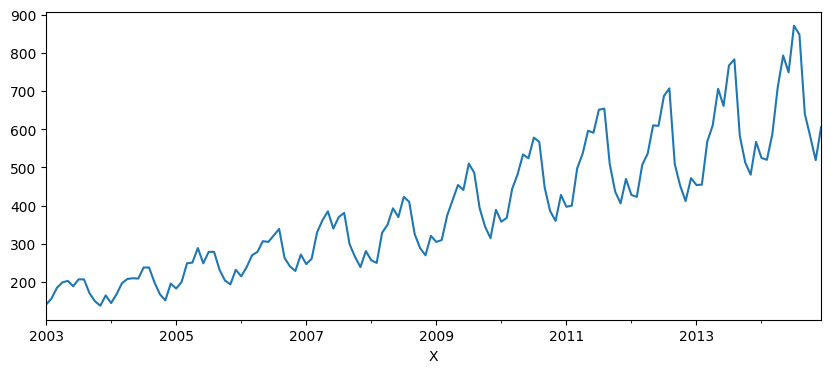

In [72]:
yt1=df1.Target
yt1.plot(figsize=(10,4))
plt.show()

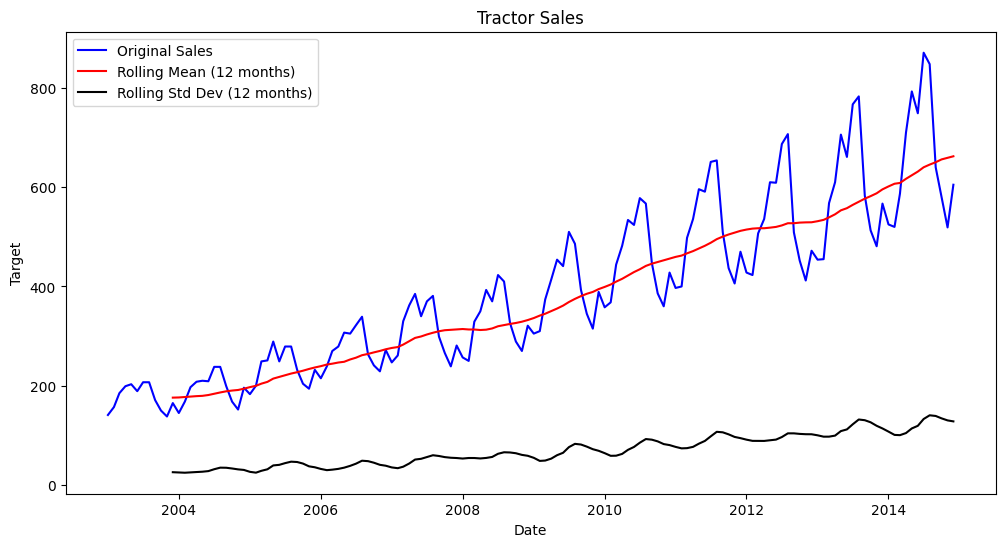

In [73]:
# Rolling Mean and Rolling Standard Deviation
rolling_mean = yt1.rolling(window=12).mean()
rolling_std = yt1.rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(yt1, color='blue', label='Original Sales')
plt.plot(rolling_mean, color='red', label='Rolling Mean (12 months)')
plt.plot(rolling_std, color='black', label='Rolling Std Dev (12 months)')
plt.title("Tractor Sales")
plt.xlabel("Date")
plt.ylabel("Target")
plt.legend(loc='best')
plt.show()

For the target variable (tractor sold), the mean is increasing and it also has seasonality

In [80]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Target'])

# Extract test statistic and p-value
adf_statistic, p_value = result[0], result[1]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("The series is stationary")
else:
    print("The series is non-stationary")


ADF Statistic: 1.1088250591467386
p-value: 0.995291241524842
The series is non-stationary


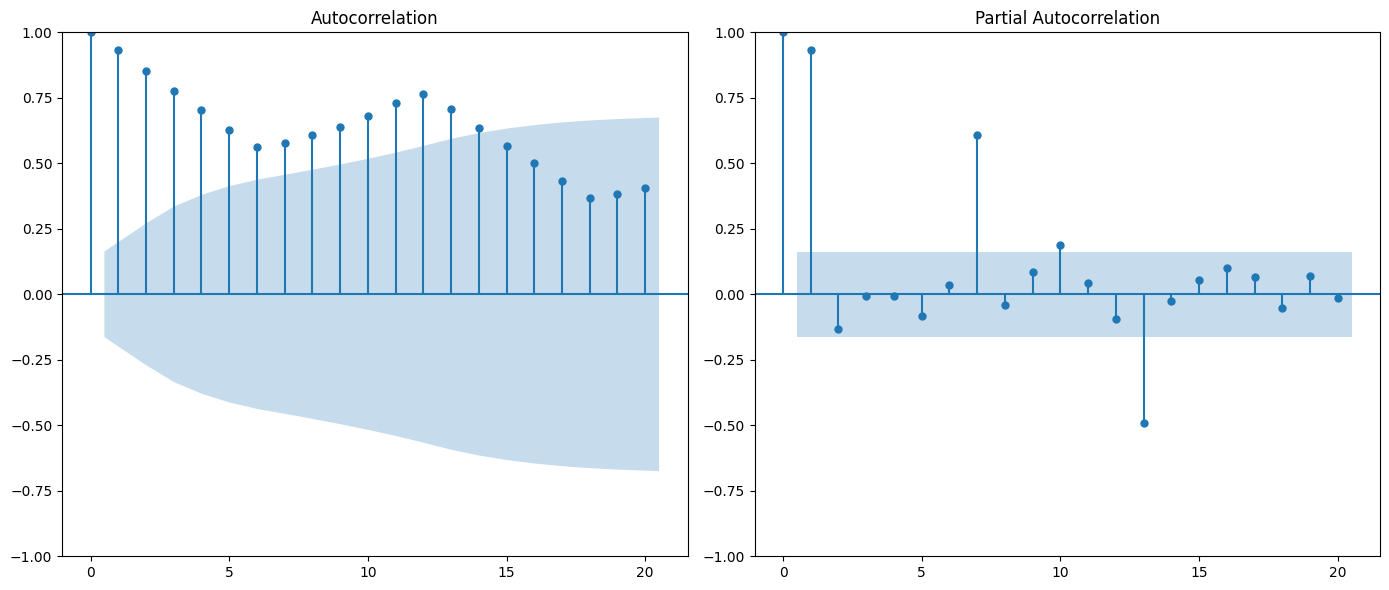

In [75]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(df['Target'], lags=20, ax=plt.gca())

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(df['Target'], lags=20, ax=plt.gca(), method='ywm')

plt.tight_layout()
plt.show()


In Time series forecasting we only use PACF as it only considers the direct effect of previous time lags and current time on target variable while ACF consider both direct effect and indirect effect of previous time lags on the current time target variable causing more co-relation.